In [265]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [266]:
google = pd.read_csv("GOOGLE_BIG_last_24.csv")
apple = pd.read_csv("AAPL_last_24.csv")

In [267]:
pred = pd.read_csv("forecast_output_0_AAPL.csv")

In [268]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
0,189.919998,190.669998,188.899994,189.789993,188.864731,40552600
1,189.779999,191.080002,189.399994,190.399994,189.471756,38415400
2,190.899994,192.089996,188.970001,189.369995,188.446793,43014200
3,189.839996,190.320007,188.190002,189.949997,189.023956,48794400
4,190.330002,191.559998,189.229996,191.240005,190.307678,45679300


In [269]:
pred.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.007887,0.007292,0.006915,0.008480,0.009029,0.015395
1,0.004875,0.004762,0.005658,0.005550,0.005694,0.026988
2,0.012202,0.014648,0.017392,0.014926,0.017062,0.021993
3,0.036075,0.044332,0.050931,0.045007,0.053031,0.030527
4,0.063575,0.075955,0.082896,0.077958,0.084802,0.033112


In [270]:
max_val, min_val = apple['Open'].tail(24).max(), apple['Open'].tail(24).min()
pred["Open"] = pred["Open"] * (max_val - min_val) + min_val

In [271]:
pred.head()

,Open,High,Low,Close,Adj Close,Volume
0,189.844987,0.007292,0.006915,0.008480,0.009029,0.015395
1,189.820169,0.004762,0.005658,0.005550,0.005694,0.026988
2,189.880543,0.014648,0.017392,0.014926,0.017062,0.021993
3,190.077257,0.044332,0.050931,0.045007,0.053031,0.030527
4,190.303855,0.075955,0.082896,0.077958,0.084802,0.033112


In [272]:
off_by = apple.iloc[0][0] - pred.iloc[0][0]

/var/folders/fz/6jqrkhfj6mj715w4gn4yjt080000gn/T/ipykernel_34735/3567449903.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  off_by = apple.iloc[0][0] - pred.iloc[0][0]


In [273]:
pred["Open"] += off_by

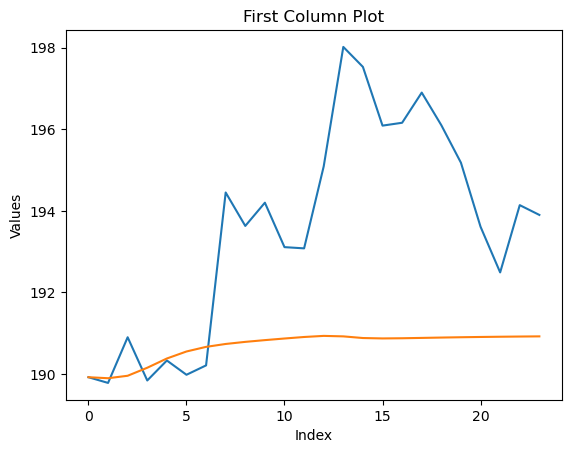

In [274]:
plt.plot(apple.iloc[:, 0])  # Use .iloc to select the first column
plt.plot(pred.iloc[:, 0])  # Use .iloc to select the first column
plt.title("First Column Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

In [275]:
google_first_column = google.iloc[:, 0]
apple_first_column = apple.iloc[:, 0]
pred_first_column = pred.iloc[:, 0]
combined_max = max(apple_first_column.max(), pred_first_column.max())
combined_min = min(apple_first_column.min(), pred_first_column.min())
value_range = combined_max - combined_min

# Compute the Mean Absolute Difference (MAD) and normalize it
normalized_difference = (abs(apple_first_column - pred_first_column).mean()) / value_range

In [276]:
normalized_difference

0.3599330499341009

In [279]:
apple = pd.read_csv("NVDA_data.csv")
headers = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
apple = apple[headers]
apple.to_csv("NVDA_data.csv", index=False)

In [280]:
last_24 = apple.tail(24)

# 3. Remove the last 24 rows from the original DataFrame
apple = apple.iloc[:-24]

# 4. Save the last 24 rows to a separate CSV file
last_24.to_csv('NVDA_last_24.csv', index=False)

# 5. Overwrite the original CSV with the updated DataFrame
apple.to_csv('NVDA_data.csv', index=False)